In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ', parse_dates=[['1:Date', '2:Time']])

In [3]:
df.head()

,1:Date_2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
1,2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2,2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
3,2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
4,2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [4]:
df.dtypes

1:Date_2:Time                      datetime64[ns]
3:Temperature_Comedor_Sensor              float64
4:Temperature_Habitacion_Sensor           float64
5:Weather_Temperature                     float64
6:CO2_Comedor_Sensor                      float64
7:CO2_Habitacion_Sensor                   float64
8:Humedad_Comedor_Sensor                  float64
9:Humedad_Habitacion_Sensor               float64
10:Lighting_Comedor_Sensor                float64
11:Lighting_Habitacion_Sensor             float64
12:Precipitacion                          float64
13:Meteo_Exterior_Crepusculo              float64
14:Meteo_Exterior_Viento                  float64
15:Meteo_Exterior_Sol_Oest                float64
16:Meteo_Exterior_Sol_Est                 float64
17:Meteo_Exterior_Sol_Sud                 float64
18:Meteo_Exterior_Piranometro             float64
19:Exterior_Entalpic_1                      int64
20:Exterior_Entalpic_2                      int64
21:Exterior_Entalpic_turbo                  int64


In [5]:
df=df.rename(columns={"1:Date_2:Time":"Date_Time"})

In [6]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [7]:
data.head()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
Date_Time,,,,,,,,,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [8]:
data=data.rename(columns={"3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

In [9]:
data.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,12:Precipitacion,...,15:Sunlight_West,16:Sunlight_East,17:Sunlight_South,18:Sun_Irradiance,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week
Date_Time,,,,,,,,,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [10]:
data = data.drop(['6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)

In [11]:
data.index = df.Date_Time
values = data.values

In [12]:
data.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor
Date_Time,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,31.5800,30.1600,11.7200,14.1600,0.65,0.000000,0.0,-3.12000,16.0700,39.0800
2012-04-18 00:15:00,20.1593,19.7600,13.0,31.6240,30.0613,11.5240,14.7600,0.65,0.000000,0.0,-2.80800,16.0400,38.9680
2012-04-18 00:30:00,20.0740,19.6580,13.0,31.6507,30.1773,11.6220,14.9547,0.65,0.088000,0.0,-2.96400,16.0160,38.9467
2012-04-18 00:45:00,19.9773,19.5833,13.0,31.6987,30.2560,11.7847,15.0520,0.65,0.127333,0.0,-3.02933,15.9427,39.0760
2012-04-18 01:00:00,19.8933,19.5000,13.0,31.7707,30.3840,11.5887,15.2147,0.65,0.000000,0.0,-2.88600,15.8627,40.0413


In [13]:
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]

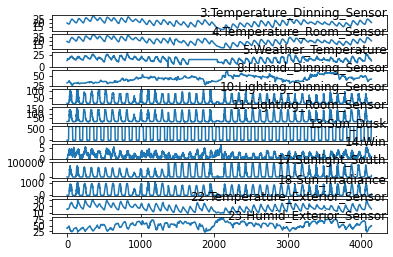

In [14]:
from matplotlib import pyplot

i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([5.03528341e-01, 4.99313187e-01, 4.48275862e-01, 1.55436408e-01,
       8.21761978e-02, 9.69749745e-03, 1.86761806e-02, 6.93998310e-05,
       0.00000000e+00, 0.00000000e+00, 9.50715823e-04, 3.31002138e-01,
       2.73451638e-01])

In [16]:
from pandas import DataFrame
from pandas import concat
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data



# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [63]:
n_hours = 10
n_features = 13 
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values
n_train_hours = 30 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(720, 130) 720 (720,)


In [64]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(720, 10, 13) (720,) (3407, 10, 13) (3407,)


# LSTM Model Timeseries

In [65]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=15, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 720 samples, validate on 3407 samples
Epoch 1/200
 - 2s - loss: 0.1416 - val_loss: 0.0801
Epoch 2/200
 - 1s - loss: 0.0656 - val_loss: 0.0506
Epoch 3/200
 - 1s - loss: 0.0616 - val_loss: 0.0469
Epoch 4/200
 - 1s - loss: 0.0398 - val_loss: 0.0452
Epoch 5/200
 - 1s - loss: 0.0455 - val_loss: 0.0427
Epoch 6/200
 - 1s - loss: 0.0377 - val_loss: 0.0622
Epoch 7/200
 - 1s - loss: 0.0398 - val_loss: 0.0370
Epoch 8/200
 - 1s - loss: 0.0458 - val_loss: 0.0419
Epoch 9/200
 - 1s - loss: 0.0345 - val_loss: 0.0387
Epoch 10/200
 - 1s - loss: 0.0320 - val_loss: 0.0378
Epoch 11/200
 - 1s - loss: 0.0421 - val_loss: 0.0450
Epoch 12/200
 - 1s - loss: 0.0340 - val_loss: 0.0377
Epoch 13/200
 - 1s - loss: 0.0290 - val_loss: 0.0397
Epoch 14/200
 - 1s - loss: 0.0296 - val_loss: 0.0405
Epoch 15/200
 - 1s - loss: 0.0228 - val_loss: 0.0345
Epoch 16/200
 - 1s - loss: 0.0211 - val_loss: 0.0494
Epoch 17/200
 - 1s - loss: 0.0227 - val_loss: 0.0592
Epoch 18/200
 - 1s - loss: 0.0314 - val_loss: 0.0487
Epoch 19

Epoch 154/200
 - 1s - loss: 0.0174 - val_loss: 0.0431
Epoch 155/200
 - 1s - loss: 0.0126 - val_loss: 0.0207
Epoch 156/200
 - 1s - loss: 0.0178 - val_loss: 0.0396
Epoch 157/200
 - 1s - loss: 0.0144 - val_loss: 0.0216
Epoch 158/200
 - 1s - loss: 0.0107 - val_loss: 0.0208
Epoch 159/200
 - 1s - loss: 0.0105 - val_loss: 0.0222
Epoch 160/200
 - 1s - loss: 0.0143 - val_loss: 0.0192
Epoch 161/200
 - 1s - loss: 0.0121 - val_loss: 0.0208
Epoch 162/200
 - 1s - loss: 0.0087 - val_loss: 0.0208
Epoch 163/200
 - 1s - loss: 0.0112 - val_loss: 0.0202
Epoch 164/200
 - 1s - loss: 0.0105 - val_loss: 0.0220
Epoch 165/200
 - 1s - loss: 0.0146 - val_loss: 0.0337
Epoch 166/200
 - 1s - loss: 0.0177 - val_loss: 0.0248
Epoch 167/200
 - 1s - loss: 0.0095 - val_loss: 0.0198
Epoch 168/200
 - 1s - loss: 0.0108 - val_loss: 0.0230
Epoch 169/200
 - 1s - loss: 0.0072 - val_loss: 0.0211
Epoch 170/200
 - 1s - loss: 0.0073 - val_loss: 0.0186
Epoch 171/200
 - 1s - loss: 0.0095 - val_loss: 0.0194
Epoch 172/200
 - 1s - loss: 

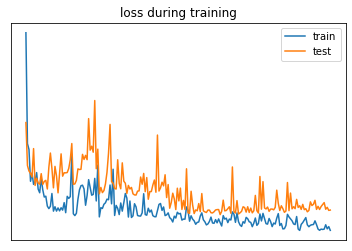

In [66]:
plt.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

In [69]:
from math import sqrt
from numpy import concatenate
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
rmse = sqrt(mean_squared_error(test_y,pred))
print('Test RMSE: %.3f' % rmse)
y_pred=[]
for i in range(0,3407):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])
y_Test = []
for i in range(0,3407):   
    arrtolist=test_y[i].tolist()    
    y_Test.append(arrtolist)
print("Pearson Correlation for LSTM Timeseries Model")
correlation, p_value = stats.pearsonr(y_Test,y_pred)
print(correlation)
scorr, p = stats.spearmanr(y_Test,y_pred)
print("Spearman Correlation for LSTM Timeseries Model")
print(scorr)

Test RMSE: 0.031
Pearson Correlation for LSTM Timeseries Model
0.9888219573182196
Spearman Correlation for LSTM Timeseries Model
0.9936645816007486


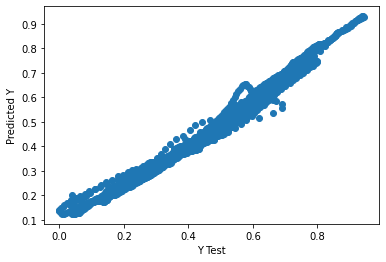

In [70]:
plt.scatter(y_Test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [71]:
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

# Linear Regression Timeseries

In [72]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(train_X,train_y)
y_pred= linearRegressor.predict(test_X)
#np.mean(y_Prediction_Test)    
from sklearn.metrics import mean_squared_error
print("Mean squared error for linear regression model: %.2f" % mean_squared_error(test_y,y_pred))
correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for linear regression model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for linear regression model")
print(scorr)

Mean squared error for linear regression model: 0.00
Pearson Correlation for linear regression model
0.9998609712926803
Spearman Correlation for linear regression model
0.9998178383520628


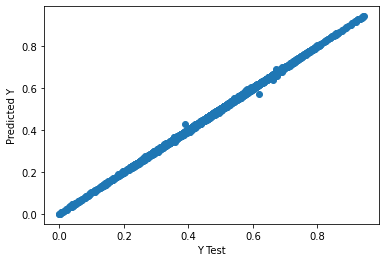

In [73]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# SVR Timeseries

In [74]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel='rbf')
SVM_regressor.fit(train_X, train_y)
y_pred=SVM_regressor.predict(test_X)
from sklearn.metrics import mean_squared_error

correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for SVM model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for SVM model")
print(scorr)
print("Mean squared error for SVM model: %.2f" % mean_squared_error(test_y,y_pred))

Pearson Correlation for SVM model
0.9508439880351466
Spearman Correlation for SVM model
0.9552840046692718
Mean squared error for SVM model: 0.01


C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


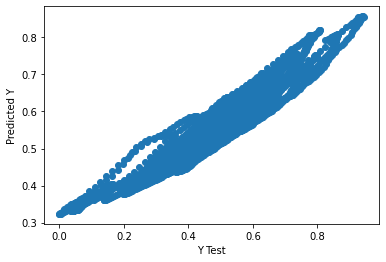

In [75]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision Tree Regression Timeseries

In [76]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 0)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for DecisionTree model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for DecisionTree model")
print(scorr)
print("Mean squared error for DecisionTree model: %.2f" % mean_squared_error(test_y,y_pred))

Pearson Correlation for DecisionTree model
0.8796231655478899
Spearman Correlation for DecisionTree model
0.9609835514469025
Mean squared error for DecisionTree model: 0.01


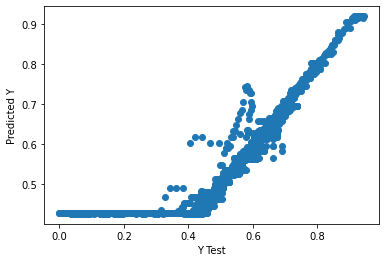

In [77]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNN Regression Timeseries

RMSE value for k=  1 is: 0.16513787657792953
RMSE value for k=  2 is: 0.1650814994039359
RMSE value for k=  3 is: 0.16541701012521537
RMSE value for k=  4 is: 0.1655647735747705
RMSE value for k=  5 is: 0.1653445890915056
RMSE value for k=  6 is: 0.16535113059894363
RMSE value for k=  7 is: 0.16561627970380355
RMSE value for k=  8 is: 0.16585480579036804
RMSE value for k=  9 is: 0.16615333297072782
RMSE value for k=  10 is: 0.16641526945818347
RMSE value for k=  11 is: 0.16668474311388234
RMSE value for k=  12 is: 0.1669231246208694
RMSE value for k=  13 is: 0.16710687006204344
RMSE value for k=  14 is: 0.16722267764571405
RMSE value for k=  15 is: 0.16744041147490676
RMSE value for k=  16 is: 0.1676113080982693
RMSE value for k=  17 is: 0.16771723532936225
RMSE value for k=  18 is: 0.1678771096746073
RMSE value for k=  19 is: 0.16792735735296133
RMSE value for k=  20 is: 0.16805240348520684


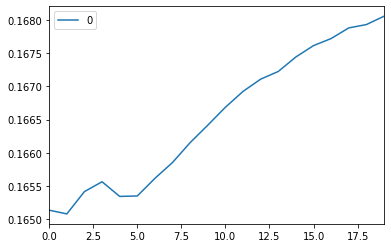

In [78]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(train_X,train_y)  #fit the model
    y_pred=model.predict(test_X) #make prediction on test set
    error = np.sqrt(mean_squared_error(test_y,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [85]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for KNN model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for KNN model")
print(scorr)
print("Mean squared error for KNN model: %.2f" % mean_squared_error(test_y,y_pred))

Pearson Correlation for KNN model
0.7632408996235209
Spearman Correlation for KNN model
0.8179890119030243
Mean squared error for KNN model: 0.03


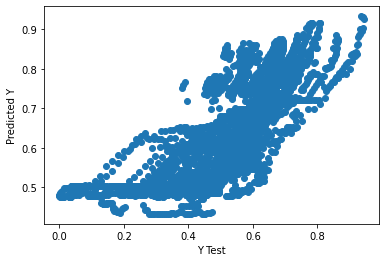

In [86]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Boosting Regression Timeseries

In [87]:
from sklearn import ensemble
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}
model=ensemble.GradientBoostingRegressor(**params)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for Boosting Regression model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for Boosting Regression model")
print(scorr)
print("Mean squared error for Boosting Regression model: %.2f" % mean_squared_error(test_y,y_pred))

Pearson Correlation for Boosting Regression model
0.8799905430391928
Spearman Correlation for Boosting Regression model
0.935598715319586
Mean squared error for Boosting Regression model: 0.01


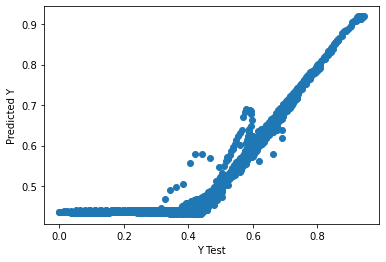

In [88]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Bagging Regression Timeseries

In [89]:
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(test_y,y_pred)
print("Pearson Correlation for Bagging Regression model")
print(correlation)
scorr, p = stats.spearmanr(test_y,y_pred)
print("Spearman Correlation for Bagging Regression model")
print(scorr)
print("Mean squared error for Bagging Regression model: %.2f" % mean_squared_error(test_y,y_pred))

Pearson Correlation for Bagging Regression model
0.869377525185353
Spearman Correlation for Bagging Regression model
0.9228757308886804
Mean squared error for Bagging Regression model: 0.01


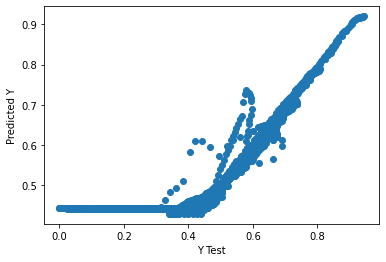

In [90]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()